In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/content/drive/MyDrive/maths for machine learning/tvmarketing.csv')

<Axes: xlabel='TV', ylabel='Sales'>

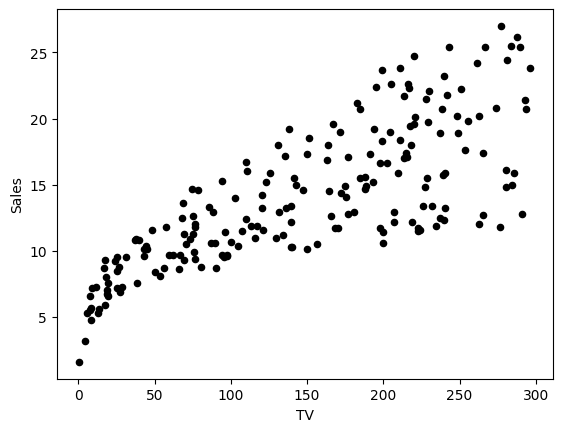

In [14]:
df.plot(x='TV', y='Sales', kind='scatter', c='black')

In [15]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [16]:
X=np.array(df.TV)
Y=np.array(df.Sales)

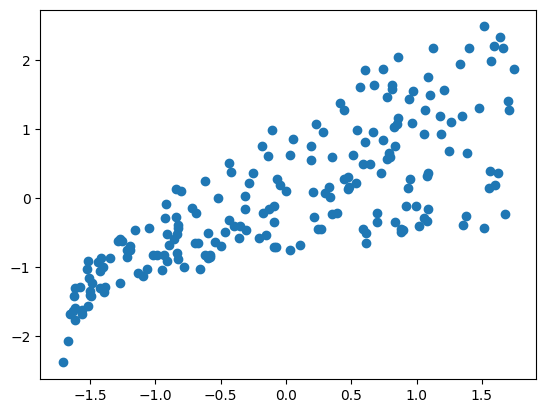

In [17]:
#normalize

X_norm=((X-np.mean(X))/np.std(X)).reshape((1,len(X)))
Y_norm=((Y-np.mean(Y))/np.std(Y)).reshape((1,len(Y)))

plt.scatter(x=X_norm, y=Y_norm)

In [18]:
def layer_size(X,Y):
  x_n=X.shape[0] #size of input layer
  y_n=Y.shape[0] #size of output layer

  return (x_n,y_n)


In [19]:
def initialize(n_x,n_y):
  W=np.random.randn(n_y,n_x)*0.01 #Scaling Factor: Multiplying the matrix by 0.01 scales down the random values. This is a common practice in neural network initialization to ensure that the weights start with small values. Small initial values are beneficial because they help avoid problems such as exploding or vanishing gradients during the training of the model.
  b=np.zeros((n_y,1))

  parameters={"W":W,"b":b}

  return parameters

In [20]:
def forward_propagation(parameters,X):
  W=parameters["W"]
  b=parameters["b"]

  Z=np.matmul(W,X)+b
  y_hat=Z
  return y_hat

In [21]:
def cost_compute(Y,y_hat):
  m=y_hat.shape[1]
  cost=np.sum((y_hat-Y)**2)/(2*m)
  return cost

In [22]:
def backward_propagation(y_hat,X,Y):
  m=X.shape[1]
  dZ=y_hat-Y
  dZdw= (1/m)*np.dot(dZ,X.T)#np.dot acts as matrix mul in case of more than 1 dimensions and as a vector mul in case of 1 dimension here we use np.diot because we can have opnly 1 example also
  dZdb=(1/m)*np.sum(dZ,axis=1,keepdims=True)

  gradient={"dzdw":dZdw,"dzdb":dZdb}

  return gradient

In [23]:
def update_parameters(parameters,gradient,learning_rate):
  w=parameters["W"]
  b=parameters["b"]

  dw=gradient["dzdw"]
  db=gradient["dzdb"]

  w=w-learning_rate*dw
  b=b-learning_rate*db

  parameters={"W":w,"b":b}

  return parameters

In [24]:
def nn_model(X,Y,learning_rate,iterations):

  x_n=layer_size(X,Y)[0]
  y_n=layer_size(X,Y)[1]

  parameters=initialize(x_n,y_n)

  for i in range(0,iterations):

    y_hat=forward_propagation(parameters,X)

    cost=cost_compute(y_hat,Y)

    print(cost)

    gradient=backward_propagation(y_hat,X,Y)

    parameters= update_parameters(parameters,gradient,learning_rate)

  return parameters

parameters_simple = nn_model(X_norm, Y_norm,learning_rate=1.2,iterations=30)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

0.49740228621474375
0.2061960670405557
0.19454781827358814
0.19408188832290946
0.1940632511248823
0.1940625056369612
0.19406247581744437
0.19406247462466367
0.1940624745769525
0.194062474575044
0.19406247457496767
0.19406247457496462
0.19406247457496448
0.1940624745749645
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
0.19406247457496448
W = [[0.78222442]]
b = [[-3.19744231e-16]]


In [34]:
def predict(X, Y, parameters, X_pred):

    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    print(type(X))
    # Use the same mean and standard deviation of the original training array X.
    if isinstance(X, pd.Series):
        print('series')
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    Y_pred_norm= np.matmul(W,X_pred_norm)+b
    Y_pred= Y_pred_norm*np.std(Y)+ np.mean(Y)



    return Y_pred[0]

X_pred = np.array([50, 120, 280])
Y_pred = predict(df["TV"], df["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")


<class 'pandas.core.series.Series'>
series
TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[ 9.40942557 12.7369904  20.34285287]


In [30]:
print(isinstance(df['TV'],pd.Series))

True
